In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [37]:
Corona_Data = pd.read_csv(r"C:\Users\ooluw\OneDrive\Desktop\novel-corona-virus-2019-dataset\covid_19_data.csv", parse_dates = ['ObservationDate', 'Last Update'])

In [38]:
Corona_Data.shape

(4935, 8)

In [39]:
Corona_Data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [40]:
Corona_Data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4930,4931,2020-03-11,Mississippi,US,2020-03-10 02:33:04,0,0,0
4931,4932,2020-03-11,North Dakota,US,2020-03-10 02:33:04,0,0,0
4932,4933,2020-03-11,West Virginia,US,2020-03-10 02:33:04,0,0,0
4933,4934,2020-03-11,Wyoming,US,2020-03-10 02:33:04,0,0,0
4934,4935,2020-03-11,NaN,occupied Palestinian territory,2020-03-11 20:53:02,0,0,0


In [41]:
Corona_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 8 columns):
SNo                4935 non-null int64
ObservationDate    4935 non-null datetime64[ns]
Province/State     3120 non-null object
Country/Region     4935 non-null object
Last Update        4935 non-null datetime64[ns]
Confirmed          4935 non-null int64
Deaths             4935 non-null int64
Recovered          4935 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 308.6+ KB


In [42]:
Corona_Data.drop(labels=["SNo", "Last Update"], axis=1, inplace=True)
Corona_Data.fillna(value="Unknown", inplace=True)

In [43]:
Corona_Cleaned_Data = Corona_Data.rename(columns = {'Country/Region': 'Country'})
Corona_Cleaned_Data.head()

,ObservationDate,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0


In [44]:
Corona_Cleaned_Data['Country'] = Corona_Cleaned_Data['Country'].replace('Mainland China', 'China')
Corona_Cleaned_Data['Province/State'] = Corona_Cleaned_Data['Province/State'].replace('Bavaria', 'Unknown')
Corona_Cleaned_Data['Province/State'] = Corona_Cleaned_Data['Province/State'].replace('None', 'Unknown')
Corona_Cleaned_Data['Province/State'] = Corona_Cleaned_Data['Province/State'].replace('From Diamond Princess', 'Unknown')
Corona_Cleaned_Data.head()

,ObservationDate,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1,0,0
1,2020-01-22,Beijing,China,14,0,0
2,2020-01-22,Chongqing,China,6,0,0
3,2020-01-22,Fujian,China,1,0,0
4,2020-01-22,Gansu,China,0,0,0


In [45]:
Corona_Cleaned_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 6 columns):
ObservationDate    4935 non-null datetime64[ns]
Province/State     4935 non-null object
Country            4935 non-null object
Confirmed          4935 non-null int64
Deaths             4935 non-null int64
Recovered          4935 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 231.5+ KB


In [46]:
# Still Infected Patients
Corona_Cleaned_Data['Still_Infected'] = Corona_Cleaned_Data['Confirmed'] - Corona_Cleaned_Data['Deaths'] - Corona_Cleaned_Data['Recovered']

In [47]:
Corona_StillInfected = Corona_Cleaned_Data['Still_Infected']
Corona_StillInfected.sum()

1771212

In [48]:
Corona_Cleaned_Data.head()

,ObservationDate,Province/State,Country,Confirmed,Deaths,Recovered,Still_Infected
0,2020-01-22,Anhui,China,1,0,0,1
1,2020-01-22,Beijing,China,14,0,0,14
2,2020-01-22,Chongqing,China,6,0,0,6
3,2020-01-22,Fujian,China,1,0,0,1
4,2020-01-22,Gansu,China,0,0,0,0


In [73]:
Corona_DateBasis = Corona_Cleaned_Data.groupby('ObservationDate')['Confirmed','Deaths', 'Recovered', 'Still_Infected'].sum()
Corona_DateBasis = Corona_DateBasis.reset_index()
Corona_DateBasis = Corona_DateBasis.sort_values('ObservationDate', ascending = True)
Corona_DateBasis.head().style.background_gradient(cmap = 'PRGn')

,ObservationDate,Confirmed,Deaths,Recovered,Still_Infected
0,2020-01-22 00:00:00,555,17,28,510
1,2020-01-23 00:00:00,653,18,30,605
2,2020-01-24 00:00:00,941,26,36,879
3,2020-01-25 00:00:00,1438,42,39,1357
4,2020-01-26 00:00:00,2118,56,52,2010


In [74]:
Corona_DateBasis.tail().style.background_gradient(cmap = 'PRGn')

,ObservationDate,Confirmed,Deaths,Recovered,Still_Infected
45,2020-03-07 00:00:00,105836,3558,58359,43919
46,2020-03-08 00:00:00,109835,3803,60695,45337
47,2020-03-09 00:00:00,113582,3996,62512,47074
48,2020-03-10 00:00:00,118582,4262,64404,49916
49,2020-03-11 00:00:00,125865,4615,67003,54247


In [51]:
Corona_CountryBasis = Corona_Cleaned_Data.groupby('Country')['Confirmed','Deaths', 'Recovered', 'Still_Infected'].sum()
Corona_CountryBasis = Corona_CountryBasis.reset_index()
Corona_CountryBasis = Corona_CountryBasis.sort_values('Country', ascending = False)
Corona_CountryBasis.head().style.background_gradient(cmap = 'PRGn')

,Country,Confirmed,Deaths,Recovered,Still_Infected
127,occupied Palestinian territory,25,0,0,25
126,Vietnam,659,0,390,269
125,Vatican City,4,0,0,4
124,United Arab Emirates,717,0,144,573
123,Ukraine,9,0,0,9


In [52]:
Corona_CountryBasis.tail().style.background_gradient(cmap = 'PRGn')

,Country,Confirmed,Deaths,Recovered,Still_Infected
4,Algeria,151,0,0,151
3,Albania,24,1,0,23
2,Afghanistan,33,0,0,33
1,"('St. Martin',)",2,0,0,2
0,Azerbaijan,1,0,0,1


In [53]:
Corona = go.Figure()

In [54]:
Corona.update_layout(template = 'plotly_dark')
Corona.add_trace(go.Scatter(x = Corona_DateBasis['ObservationDate'],
                            y = Corona_DateBasis['Confirmed'],
                            mode = 'lines+markers',
                            name = 'Confirmed',
                            line = dict(color = 'Red', width = 2)))
Corona.add_trace(go.Scatter(x = Corona_DateBasis['ObservationDate'],
                            y = Corona_DateBasis['Deaths'],
                            mode = 'lines+markers',
                            name = 'Deaths',
                            line = dict(color = 'Green', width = 2)))
Corona.add_trace(go.Scatter(x = Corona_DateBasis['ObservationDate'],
                            y = Corona_DateBasis['Recovered'],
                            mode = 'lines+markers',
                            name = 'Recovered',
                            line = dict(color = 'Yellow', width = 2)))
Corona.add_trace(go.Scatter(x = Corona_DateBasis['ObservationDate'],
                            y = Corona_DateBasis['Still_Infected'],
                            mode = 'lines+markers',
                            name = 'Still Infected',
                            line = dict(color = 'blue', width = 2)))
Corona.show()

In [55]:
country_continent = pd.read_csv(r"C:\Users\ooluw\OneDrive\Desktop\countryContinent.csv", encoding="iso-8859-1")
country_continent = country_continent[["country", "continent"]]

country_continent.rename(columns={"country": "Country", "continent": "Continent"}, inplace=True)
Added_continents_info = pd.DataFrame([["Macau", "Asia"], ["Ivory Coast", "Africa"], ["North Ireland", "Europe"], ["North Macedonia", "Europe"], ["UK", "Europe"], ["Iran", "Asia"], [" Azerbaijan", "Asia"], ["Others", "Other"], ["Russia", "Europe"], ["Taiwan", "Asia"], ["US", "Americas"], ["South Korea", "Asia"], ["Vietnam", "Asia"]], columns=["Country", "Continent"])

country_continent = country_continent.append(Added_continents_info)

Corona_Cleaned_Data = pd.merge(Corona_Cleaned_Data, country_continent, on="Country", how="left")

Corona_Cleaned_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 0 to 4934
Data columns (total 8 columns):
ObservationDate    4935 non-null datetime64[ns]
Province/State     4935 non-null object
Country            4935 non-null object
Confirmed          4935 non-null int64
Deaths             4935 non-null int64
Recovered          4935 non-null int64
Still_Infected     4935 non-null int64
Continent          4903 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 347.0+ KB


In [56]:
latest = Corona_Cleaned_Data.groupby(["Province/State", "Country"]).last().reset_index().copy()
first = Corona_Cleaned_Data.loc[Corona_Cleaned_Data["Confirmed"] > 0, ["ObservationDate", "Country", "Confirmed"]].groupby(["Country"]).first().reset_index().copy()
global_daily = Corona_Cleaned_Data.groupby("ObservationDate").sum().reset_index().copy()

cmap = plt.get_cmap("tab20")
colors_dict = {}
colors_dict["Confirmed"] = cmap(2)
colors_dict["Still_Infected"] = cmap(0)
colors_dict["Deaths"] = cmap(6)
colors_dict["DeathRatio"] = cmap(6)
colors_dict["Recovered"] = cmap(4)

#print(colors_dict)

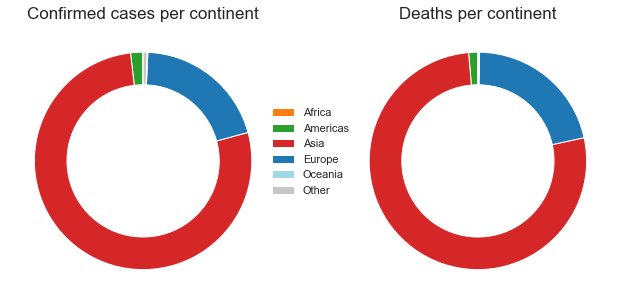

In [57]:
continents = latest.groupby(["Continent"]).sum().reset_index().copy()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(11,5)

colors = cmap(np.array([2, 4, 6, 0, 19, 15]))

axes[0].pie(continents["Confirmed"], startangle=90, radius=1, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set_title('Confirmed cases per continent', fontsize=17)

axes[1].pie(continents["Deaths"], startangle=90, radius=1, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set_title('Deaths per continent', fontsize=17)

handles = axes[1].get_legend_handles_labels()

fig.legend(labels = continents["Continent"].unique(), loc='center', frameon=False)

plt.show()
#continents.head(10)

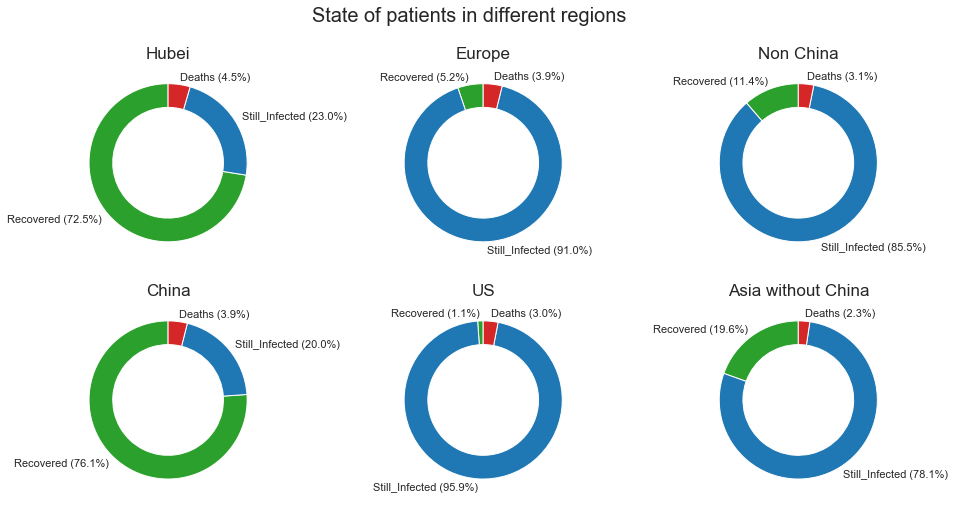

In [58]:
conditions = ["Recovered", "Still_Infected", "Deaths"]

hubei_cases = latest.loc[ latest["Province/State"] == "Hubei", conditions ].sum()
china_cases = latest.loc[ latest["Country"] == "China", conditions ].sum()
USA_cases = latest.loc[ latest["Country"] == "US", conditions ].sum()
asia_cases = latest.loc[ (latest["Continent"] == "Asia") & (latest["Country"] != "China"), conditions ].sum()
europe_cases = latest.loc[ latest["Continent"] == "Europe", conditions ].sum()
nonchina_cases = latest.loc[ latest["Country"] != "China", conditions ].sum()
world_cases = latest[ conditions ].sum()

cases = [hubei_cases, europe_cases, nonchina_cases, china_cases, USA_cases, asia_cases, world_cases]
titles = ["Hubei", "Europe", "Non China", "China","US", "Asia without China", "World"]

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(16,8)

colors = cmap(np.array([4, 0, 6]))

for i in np.arange(2):
    for j in np.arange(3):
        labels = []
        freq = round(cases[3*i+j] * 100 / cases[3*i+j].sum(),1)
        for c in conditions:
            labels.append(c + " (" + str(freq[c]) + "%)")
        
        axes[i, j].pie(cases[3*i+j], labels=labels, startangle=90, radius=1, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
        axes[i, j].set_title(titles[3*i+j], fontsize=17)

fig.suptitle("State of patients in different regions", fontsize=20)

plt.show()

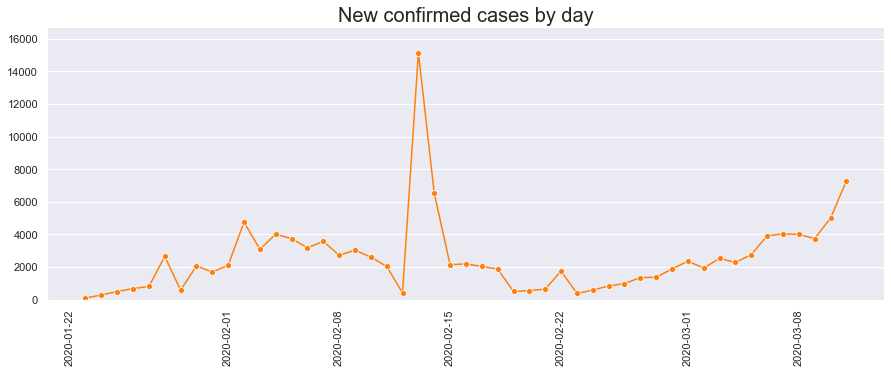

In [59]:
world_new = Corona_Cleaned_Data.groupby("ObservationDate").sum().reset_index().set_index("ObservationDate").copy()

world_new = world_new["Confirmed"].diff().dropna()

plt.figure(figsize=(15,5))
ax = sns.lineplot(x=world_new.index, y=world_new.values, marker="o", color=colors_dict["Confirmed"])

sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, world_new.max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("New confirmed cases by day", fontsize=20)
ax.grid(False, axis="x")

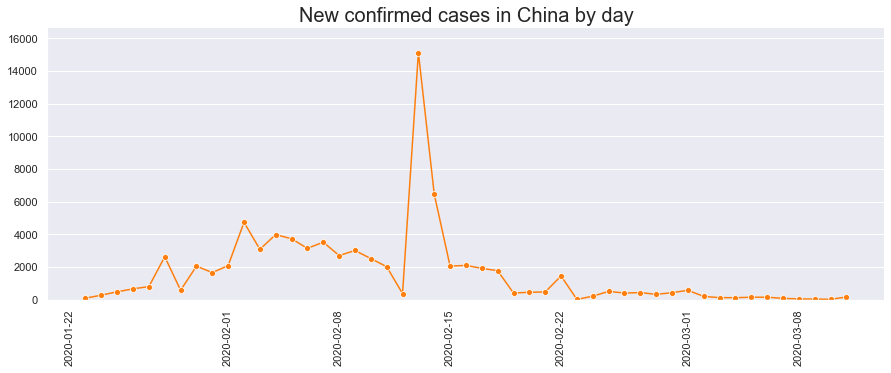

In [60]:
china_new = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "China" ].groupby("ObservationDate").sum().reset_index().set_index("ObservationDate").copy()

china_new = china_new["Confirmed"].diff().dropna()

plt.figure(figsize=(15,5))
ax = sns.lineplot(x=china_new.index, y=china_new.values, marker="o", color=colors_dict["Confirmed"])

sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, china_new.max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("New confirmed cases in China by day", fontsize=20)
ax.grid(False, axis="x")

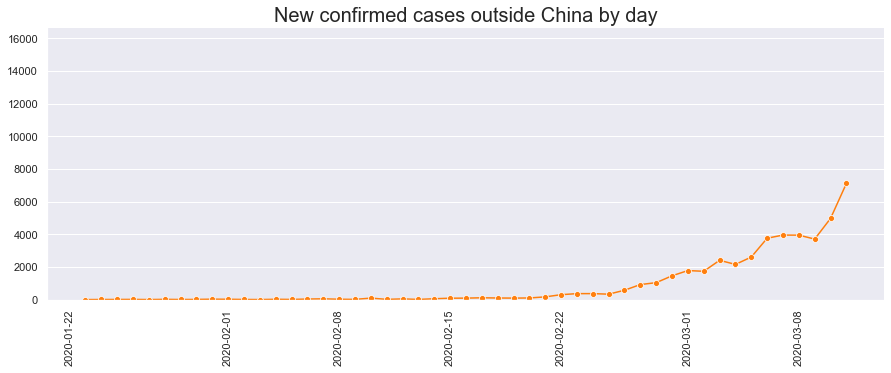

In [61]:
nonchina_new = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] != "China" ].groupby("ObservationDate").sum().reset_index().set_index("ObservationDate").copy()

nonchina_new = nonchina_new["Confirmed"].diff().dropna()

plt.figure(figsize=(15,5))
ax = sns.lineplot(x=nonchina_new.index, y=nonchina_new.values, marker="o", color=colors_dict["Confirmed"])

sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, china_new.max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("New confirmed cases outside China by day", fontsize=20)
ax.grid(False, axis="x")

In [62]:
top_10 = latest[ latest["Country"] != "China" ].groupby("Country").sum().sort_values("Confirmed", ascending=False).reset_index().head(10).copy()

top_10.head()

top_10_wide = pd.melt(top_10[["Country", "Recovered", "Deaths", "Still_Infected"]], id_vars=["Country"], value_vars=["Still_Infected","Recovered","Deaths"])

top_10_wide.head()

,Country,variable,value
0,Italy,Still_Infected,10590
1,Iran,Still_Infected,5687
2,South Korea,Still_Infected,7407
3,France,Still_Infected,3963
4,Spain,Still_Infected,2040


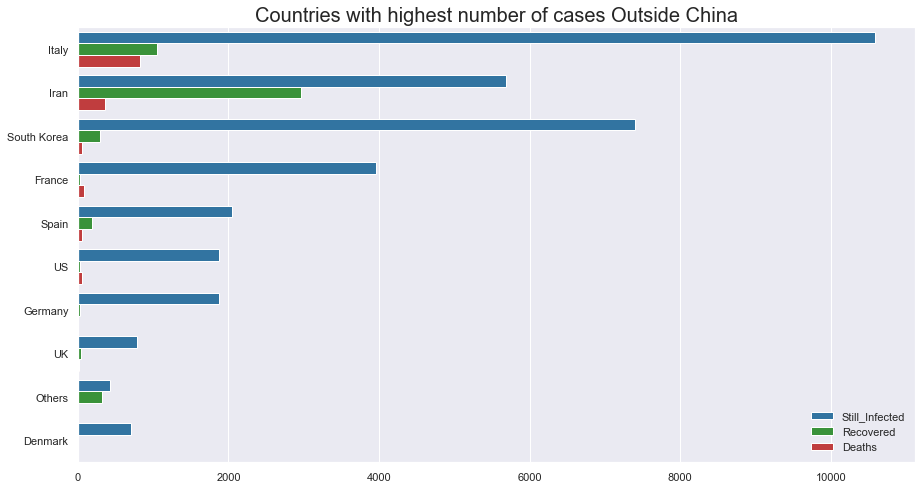

In [63]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y="Country", x="value", hue="variable", data=top_10_wide, palette=colors_dict)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Countries with highest number of cases Outside China", fontsize=20)

ax.legend(frameon=False).set_title('')

No handles with labels found to put in legend.


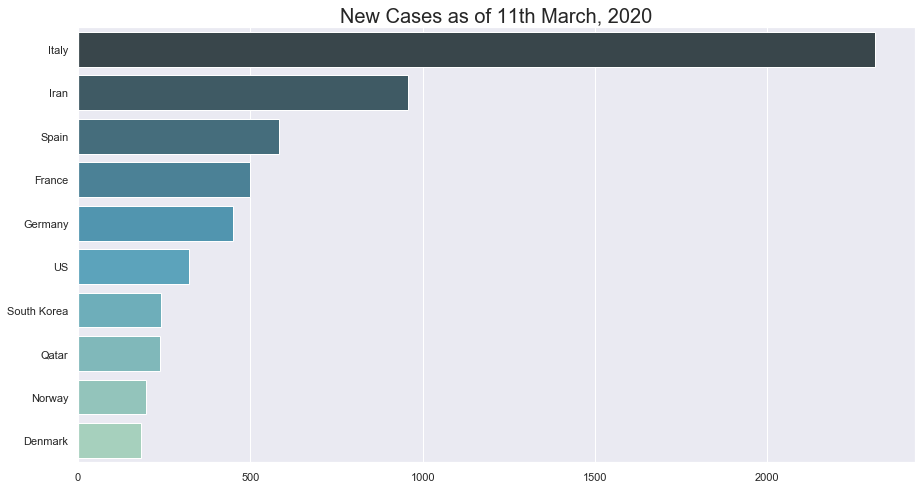

In [64]:
confirmed_wide = Corona_Cleaned_Data[["ObservationDate", "Confirmed", "Province/State", "Country"]].groupby(["Country", "ObservationDate"]).sum().reset_index().copy()

confirmed_wide = pd.pivot(confirmed_wide, columns="Country", index="ObservationDate", values="Confirmed").fillna(0.0)

confirmed_wide = confirmed_wide.diff().transpose().iloc[:,-1].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=confirmed_wide.values, y=confirmed_wide.index, palette=sns.color_palette("GnBu_d", 10))

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("New Cases as of 11th March, 2020", fontsize=20)

ax.legend(frameon=False).set_title('')

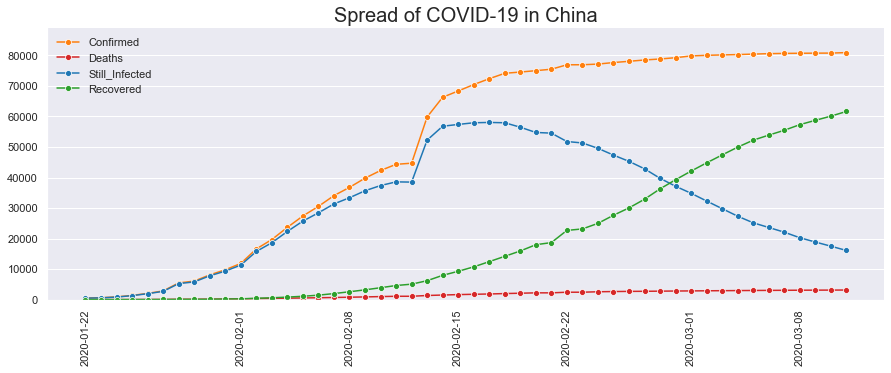

In [65]:
china = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "China" ].groupby("ObservationDate").sum().reset_index().copy()

china_long = pd.melt(china[["ObservationDate", "Confirmed", "Deaths", "Still_Infected", "Recovered"]], id_vars=["ObservationDate"], value_vars=["Confirmed","Deaths", "Still_Infected", "Recovered"])
                   
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="value", hue="variable", data=china_long, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, china["Confirmed"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Spread of COVID-19 in China", fontsize=20)
ax.legend(labels=["Confirmed","Deaths", "Still_Infected", "Recovered"], frameon=False)
ax.grid(False, axis="x")

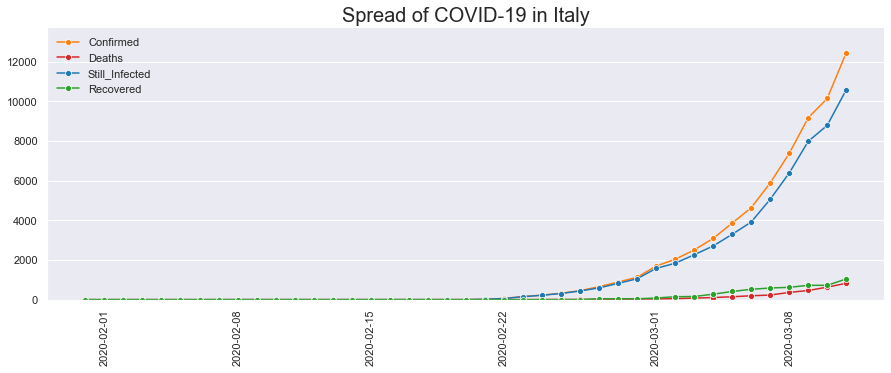

In [66]:
italy = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "Italy" ].reset_index().copy()

italy_long = pd.melt(italy[["ObservationDate", "Confirmed", "Deaths", "Still_Infected", "Recovered"]], id_vars=["ObservationDate"], value_vars=["Confirmed","Deaths", "Still_Infected", "Recovered"])
                   
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="value", hue="variable", data=italy_long, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, italy["Confirmed"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Spread of COVID-19 in Italy", fontsize=20)
ax.legend(labels=["Confirmed","Deaths", "Still_Infected", "Recovered"], frameon=False)
ax.grid(False, axis="x")

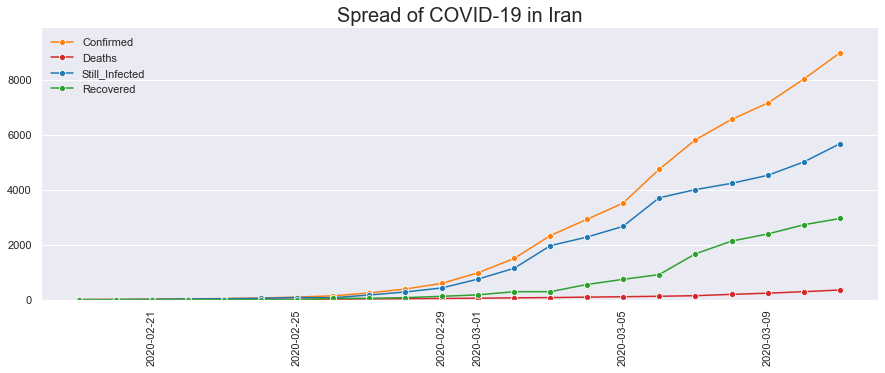

In [67]:
iran = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "Iran" ].groupby("ObservationDate").sum().reset_index().copy()

iran_long = pd.melt(iran[["ObservationDate", "Confirmed", "Deaths", "Still_Infected", "Recovered"]], id_vars=["ObservationDate"], value_vars=["Confirmed","Deaths", "Still_Infected", "Recovered"])
                   
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="value", hue="variable", data=iran_long, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, iran["Confirmed"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Spread of COVID-19 in Iran", fontsize=20)
ax.legend(labels=["Confirmed","Deaths", "Still_Infected", "Recovered"], frameon=False)
ax.grid(False, axis="x")

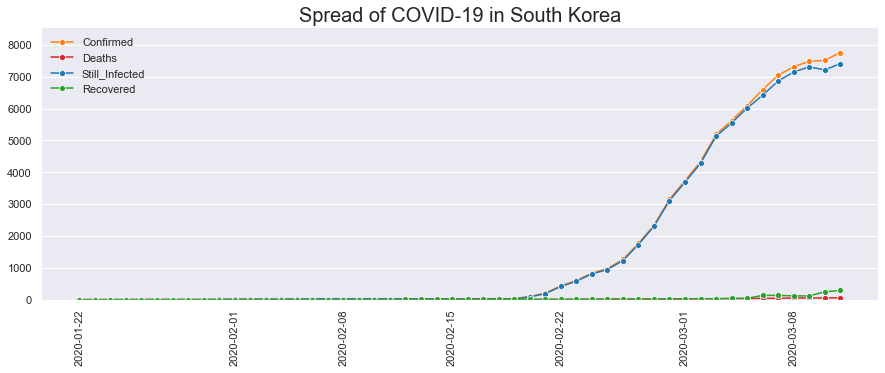

In [68]:
korea = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "South Korea" ].groupby("ObservationDate").sum().reset_index().copy()

korea_long = pd.melt(korea[["ObservationDate", "Confirmed", "Deaths", "Still_Infected", "Recovered"]], id_vars=["ObservationDate"], value_vars=["Confirmed","Deaths", "Still_Infected", "Recovered"])
                   
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="value", hue="variable", data=korea_long, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, korea["Confirmed"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Spread of COVID-19 in South Korea", fontsize=20)
ax.legend(labels=["Confirmed","Deaths", "Still_Infected", "Recovered"], frameon=False)
ax.grid(False, axis="x")

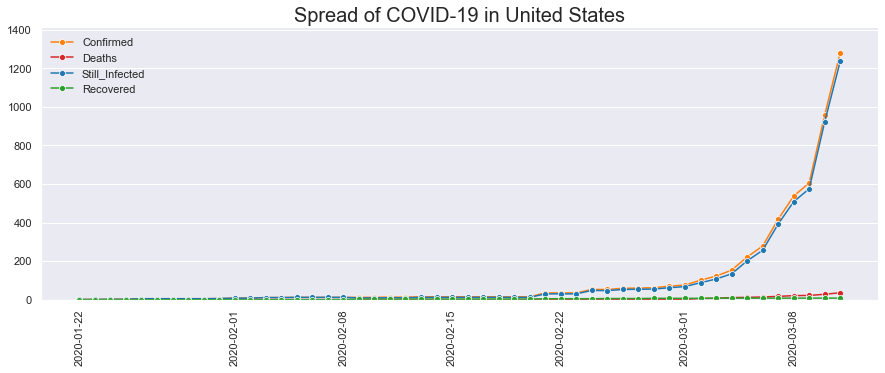

In [69]:
US = Corona_Cleaned_Data[ Corona_Cleaned_Data["Country"] == "US" ].groupby("ObservationDate").sum().reset_index().copy()

US_long = pd.melt(US[["ObservationDate", "Confirmed", "Deaths", "Still_Infected", "Recovered"]], id_vars=["ObservationDate"], value_vars=["Confirmed","Deaths", "Still_Infected", "Recovered"])
                   
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="value", hue="variable", data=US_long, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, US["Confirmed"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Spread of COVID-19 in United States", fontsize=20)
ax.legend(labels=["Confirmed","Deaths", "Still_Infected", "Recovered"], frameon=False)
ax.grid(False, axis="x")

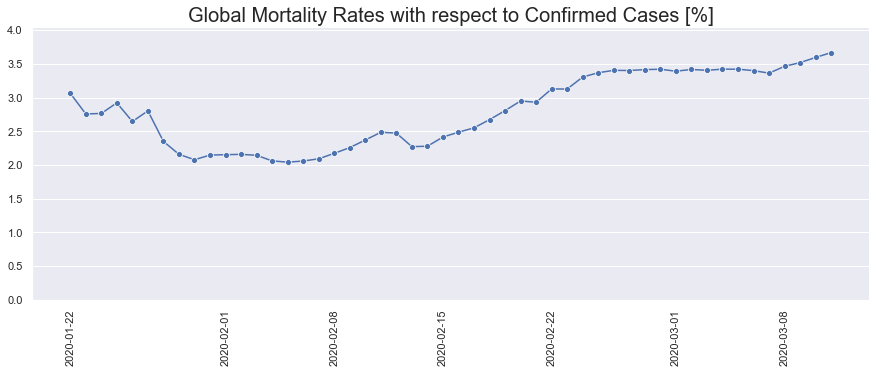

In [72]:
mortality = global_daily[["ObservationDate", "Confirmed", "Deaths"]].copy()
mortality["DeathRatio"] = (mortality["Deaths"] / mortality["Confirmed"]) * 100

plt.figure(figsize=(15,5))
ax = sns.lineplot(x="ObservationDate", y="DeathRatio", data=mortality, marker="o", palette=colors_dict)
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylim(0, mortality["DeathRatio"].max()*1.1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Global Mortality Rates with respect to Confirmed Cases [%]", fontsize=20)
ax.grid(False, axis="x")